## Homework 2: Wine Quality Prediction Using SGD
### Course: CS 474/574: Deep Learning/2021 Fall
### Due: 10/01/2021


Add your code to the following sections:

    ## add your code here
    #-----------------------

    #---------------------------------
    
Description: In this homework, you are going to practice cross-validation and implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use all function definitions given in the code (e.g., def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change the function names and input arguments. (deduct 5 points for doing this)

2. Evaluate (Cross-validation) the model trained using GD (20 points)

3. SGD implementation. 40 pts
   
4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)
5. Plot the loss curve of the SGD. (5 points)
6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

### Common mistakes
    
1. Call GD and SGD using the whole dataset

    -- GD and SGD are used to optimize the model (learn w); and we should call them using the training sets
   
2. Calculate gradient using the whole training set for SGD
    
    -- In SGD, update gradient only using mini-batches
  
3. Calculate the loss of each epoch using the average of all minibatches
    
    -- should use the w of the last mini-batch and the whole training set to calculate the loss  
   
4. Mix concepts of loss function and evaulation metrics
    -- loss function: for optimization purpose (gradient). We use the sum of square errors in this homework. L = 1/2 * sum(y_hat_i - y_i)^2
    
    -- evaluation metrics: mse and mae: mse = 1/m * sum(y_hat_i - y_i)^2, mae = 1/m * sum(abs(y_hat_i - y_i))

### 1. Load data, implement the model, loss function and GD 

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y_hat - Y))
    
    return loss

# Optimization 1: Gradient Descent
def GD(X, Y, lr = 0.000025, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        #print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

#Data shape: X: (4898, 11) Y: (4898,)

Data shape: X: (4898, 11) Y: (4898,)


### 2. Model evaluation using cross-validation (20 points)

In [18]:
## 2.1 Split the dataset into training (70%) and test (30%) sets. (5 points)
from sklearn.model_selection import train_test_split

## add your code here
#-----------------------

X_train, X_test, y_train, y_test = train_test_split(X1, Y, train_size=0.70, test_size = 0.30)

print(X_train.shape, X_test.shape)
#---------------------------------
#(3428, 11) (1470, 11)

(3428, 11) (1470, 11)


In [19]:
## 2.2 Model training using the training set and the GD function (5 points)
## add your code here
#-----------------------

w_star, loss_hist, w_hist = GD(X_train, y_train)

Y_hat_train = predict(X_train, w_star)
Y_hat_test = predict(X_test, w_star)

#---------------------------------

In [20]:
## 2.3. calculating mse&mae values on the training set and test set, respectively. (10 points)

#training error
## add your code here
#-----------------------

m_train = len(y_train)

######################
# Mean Square Errors #
######################

#### Function ####

def MSE(y_hat, y, m):
    MSE_Errors = 0
    for i in range(len(y)):
        MSE_Errors = MSE_Errors + (np.subtract(y[i],y_hat[i]))**2
    mse_train = (1/m)*(MSE_Errors)
    return(mse_train)

#### Result ####

mse_train = MSE(Y_hat_train, y_train, m_train)

########################
# Mean Absolute Errors #
########################

#### Function ####

def MAE(y_hat, y, m):
    MAE_Errors = 0
    for i in range(len(y)):
        MAE_Errors = MAE_Errors + (np.abs(np.subtract(y[i],y_hat[i])))
    mae_train = (1/m) * (MAE_Errors)
    return(mae_train)

#### Result ####

mae_train = MAE(Y_hat_train, y_train, m_train)

####################
# Training Results #
####################

m_test = len(y_test)
    
print('training mse: {} and training mae:{}'.format(mse_train, mae_train))

#print('training mse: {} and training mae:{}'.format(mse_train, mae_train))
#---------------------------------

mse_test = MSE(Y_hat_test, y_test, m_test)

## test error
## add your code here
#-----------------------

mae_test = MAE(Y_hat_test, y_test, m_test)


print('test mse: {} and test mae:{}'.format(mse_test, mae_test))
#---------------------------------
# training mse: 0.7867769198855628 and training mae:0.6927334108062077
# test mse: 0.8391500534666578 and test mae:0.714897056700805

training mse: 0.7600645595746935 and training mae:0.6837403378063927
test mse: 0.850296634029973 and test mae:0.7198904002719189


### 3. SGD implementation (40 points)
Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.

In [21]:
import numpy as np
from sklearn import utils

def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100): 
    '''Implement the minibatch Gradient Desent approach
    
        X: training data
        Y: training target
        lr: learning rate
        batch_size: batch size
        epoch: number of max epoches
        
        return: w_star, w_hist, loss_hist
    '''
    m = len(Y)
    np.random.seed(9)
    w = np.random.rand(X.shape[1]+1, 1)    #(12,1) values in [0, 1)
    w_hist = np.zeros((epoch, w.shape[0])) # (epoch,12) 
    loss_hist = np.zeros(epoch)            # (epoch,)
   
    
    ## add your code here
    #-----------------------
    for i in range(epoch):
        #(1) Shuffle data (X and Y) at the beginning of each epoch. (5 points)
        X, Y = utils.shuffle(X, Y) 
        """
        Note: get a shuffle function
        Shuffle the index, not the actual data
        """
        
        #(2) go through all minibatches and update w. (30 points)
        for b in range(int(m/batch_size)): 
            # prepare the b minibatch X_batch and Y_batch. 10 points
            X_batch = X[b * batch_size :(b * batch_size) + batch_size]
            Y_batch = Y[b * batch_size :(b * batch_size) + batch_size]
            
            #prepare A_batch and b_batch. 10 points
            b_batch = np.reshape(Y_batch, [Y_batch.shape[0],1])
            A_batch = np.c_[np.ones((batch_size, 1)), X_batch]
            #A_batch.shape
            
            #gradient calcualation and w update. 10 points
            # Optimization 1: Gradient Descent

            gradient = A_batch.T.dot(np.dot(A_batch, w)-b_batch)
            #print(i, b, X_batch.shape, A_batch.shape)
            
            w = w - (lr * gradient)
            
        ## (3) Save the loss and current weight for each epoch. 5 points
        loss_w = loss(w, X, Y)
        loss_hist[i] = loss_w
        w_hist[i,:] = w.T
        
        
        ##(4) Decay learning rate at the end of each epoch. 
        lr = lr * 0.9
    #---------------------------------

    w_star = w
    return w_star, w_hist, loss_hist  

### 4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)

In [22]:
batch_size = 32
n_epochs = 50

#train model using SGD
w_star_SGD, w_hist_SGD, loss_hist_SGD = SGD(X_train, y_train, lr = 0.0001, batch_size = batch_size, epoch = n_epochs)

## add your code here
#-----------------------
#(1) print out the predicted wine quality values and the true quality 
# values of the first 10 data samples in the test dataset.  5 points

Pred_train_SGD = predict(X_train, w_star_SGD)


Pred_test_SGD = predict(X_test, w_star_SGD)


#(2) mse and mae of the training set. 5 points

m_train = len(y_train)
mse_train_SGD = MSE(Pred_train_SGD, y_train, m_train)
mae_train_SGD = MAE(Pred_train_SGD, y_train, m_train)

#(3)mse and mae of the test set. 5 points

m_test = len(y_test)
mse_test_SGD = MSE(Pred_test_SGD, y_test, m_test)
mae_test_SGD = MAE(Pred_test_SGD, y_test, m_test)

formatted_float =list(map('{:.1f}'.format,Pred_train_SGD[:10]))
print("Predicted: ", formatted_float)
print('True: {}'.format(y_test[:10]))
print('training mse:{} and training mae: {}'.format(mse_train_SGD, mae_train_SGD))
print('test mse: {} and test mae:{}'.format(mse_test_SGD, mae_test_SGD))

#---------------------------------

# Predicted: [6.  5.6 5.7 6.5 5.7 7.  6.7 6.2 5.7 5.8]
# True [5. 6. 7. 8. 5. 4. 6. 5. 7. 5.]
# training mse: 0.7218402431182253 and training mae:0.6595991336722727
# test mse: 0.7735707034736699 and test mae:0.6839863502607874

Predicted:  ['6.0', '6.1', '5.9', '6.3', '6.0', '6.2', '6.1', '5.9', '6.1', '5.9']
True: [5. 7. 7. 6. 7. 6. 6. 8. 5. 6.]
training mse:0.7151268303349417 and training mae: 0.657017344575025
test mse: 0.7915717400384472 and test mae:0.6913868872188897


### 5. Plot the loss curve of the SGD. (5 points)

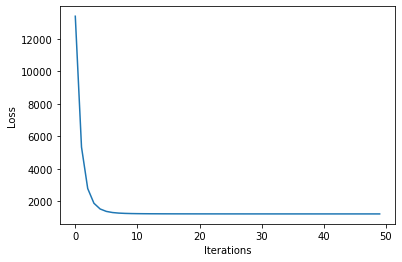

In [23]:
## add your code here
#-----------------------
batch_size = 32
n_epochs = 50

from matplotlib import pyplot as plt
plt.plot(range(n_epochs), loss_hist_SGD)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

#---------------------------------

### 6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

In [24]:
mse_SGD_train=np.zeros(n_epochs)
mse_SGD_test=np.zeros(n_epochs)

## add your code here
#-----------------------
mse_train = len(y_train)
mse_test = len(y_test)
value_train = np.zeros(len(mse_SGD_train))
value_test = np.zeros(len(mse_SGD_test))

for i in range(len(value_train)):
    Pred_train = predict(X_train, w_hist_SGD[i])
    Train = MSE(Pred_train, y_train, mse_train)
    value_train[i] = Train
    
for i in range(len(value_test)):
    Pred_test = predict(X_test, w_hist_SGD[i])
    Test = MSE(Pred_test, y_test, mse_test)
    value_test[i] = Test

#---------------------------------

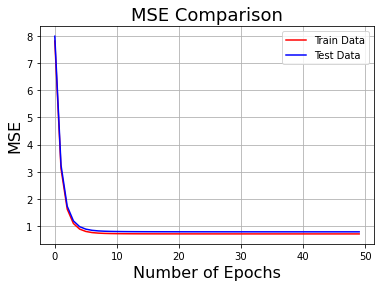

In [25]:
plt.grid()
plt.plot(range(len(mse_SGD_train)), value_train, 'r', label ='Train Data')
plt.plot(range(len(mse_SGD_test)), value_test, 'b', label ='Test Data')
plt.legend(loc='upper right')
plt.title("MSE Comparison", fontsize = 18)
plt.xlabel("Number of Epochs", fontsize = 16)
plt.ylabel("MSE", fontsize = 16)
plt.legend()
